## Data Visualizations

### Extra - Preliminary analysis

Checking IRIS DOI, ISBN and PMID

In [40]:
import os

img_path = 'img/'
os.makedirs(img_path, exist_ok=True)

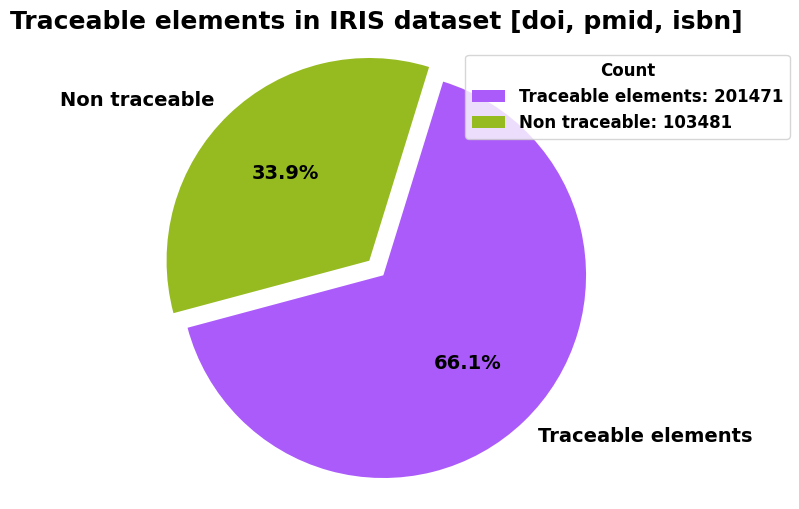

In [37]:
import matplotlib.pyplot as plt
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns
from src.read_iris import read_iris
import polars as pl


# Data
df_filtered = read_iris("data/iris-data-2024-03-14", not_filtered=False)
elements_with_dpi = len(df_filtered)
total = len(read_iris("data/iris-data-2024-03-14", not_filtered=True))

# Percentages
percent_unique_id = (elements_with_dpi / total) * 100
percent_other = 100 - percent_unique_id

# Plot
labels = ['Traceable elements', 'Non traceable']
sizes = [percent_unique_id, percent_other]
colors = ['#AA5BF9', '#96BB20']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=195, 
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)  

plt.title(
    'Traceable elements in IRIS dataset [doi, pmid, isbn]', 
    fontdict={'fontsize': 18, 'fontweight': 'bold'}
)  

# Add legend
legend_labels = [f'Traceable elements: {elements_with_dpi}', f'Non traceable: {total - elements_with_dpi}']
plt.legend(patches, legend_labels, loc="upper right", bbox_to_anchor=(1.18, 0.98), title="Count")

plt.axis('equal') 

plt.savefig('img/Traceable_elements_1.png', format='png', dpi=600)

plt.show()



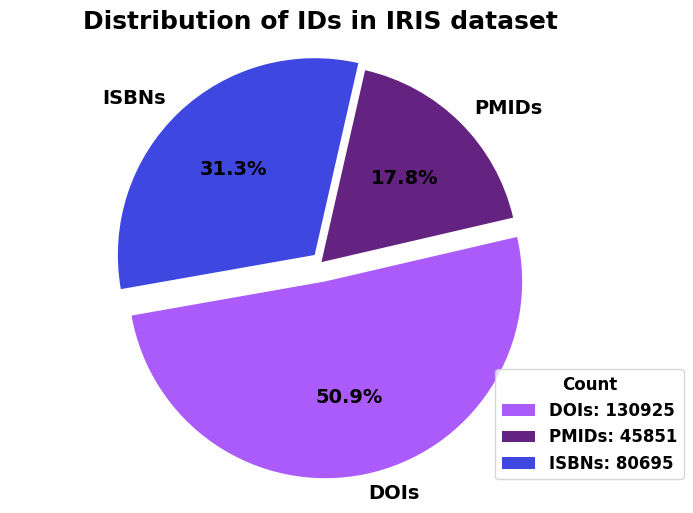

In [38]:
import polars as pl
import matplotlib.pyplot as plt
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns
from src.read_iris import read_iris


df_ids = get_iris_dois_pmids_isbns("data/iris-data-2024-03-14")

count_dois = df_ids.filter(pl.col('id').str.starts_with('doi:')).shape[0]
count_pmids = df_ids.filter(pl.col('id').str.starts_with('pmid:')).shape[0]
count_isbns = df_ids.filter(pl.col('id').str.starts_with('isbn:')).shape[0]

total_ids = df_ids.shape[0]

# Percentages
percent_dois = (count_dois / total_ids) * 100
percent_pmids = (count_pmids / total_ids) * 100
percent_isbns = (count_isbns / total_ids) * 100

# Plot
labels = ['DOIs', 'PMIDs', 'ISBNs']
sizes = [percent_dois, percent_pmids, percent_isbns]
colors = ['#AA5BF9', '#642381', '#3E48E1']
explode = (0.1, 0, 0.05) 

plt.figure(figsize=(8, 6))
patches, texts, autotexts = plt.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=190, 
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)  

plt.title(
    'Distribution of IDs in IRIS dataset', 
    fontdict={'fontsize': 18, 'fontweight': 'bold'}
)  


legend_labels = [f'DOIs: {count_dois}', f'PMIDs: {count_pmids}', f'ISBNs: {count_isbns}']
plt.legend(patches, legend_labels, loc="upper right", bbox_to_anchor=(1.1, 0.3), title="Count")


plt.axis('equal') 

plt.savefig('img/IDs_distribution.png', format='png', dpi=600)

plt.show()


### RQ1 - IRIS in OpenCitations Meta

1) What is the coverage of the publications available in IRIS, that strictly concern research conducted within the University of Bologna, in OpenCitations Meta?

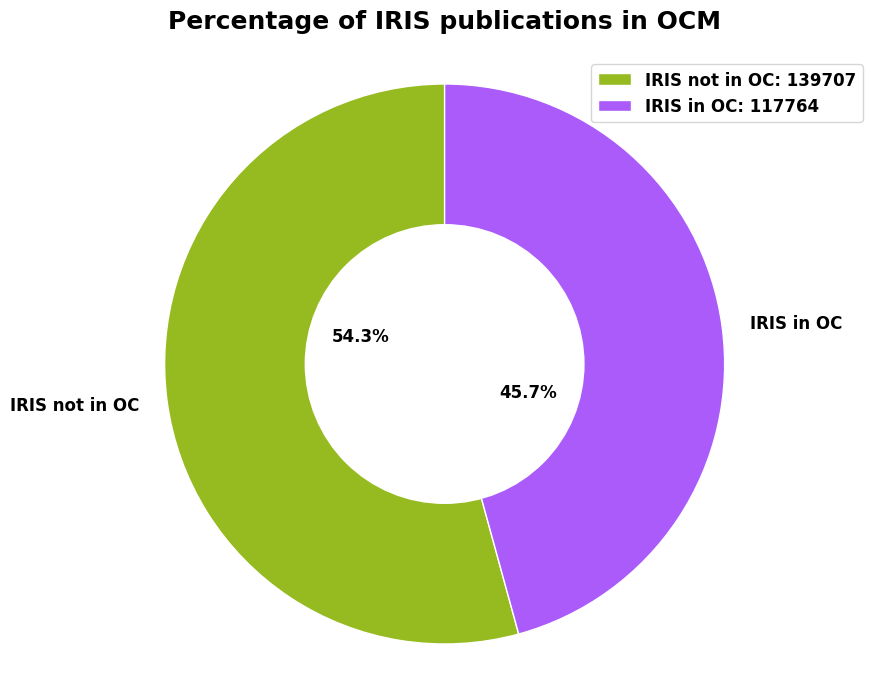

In [23]:
import matplotlib.pyplot as plt
import os
from answer_research_questions import answer_question_1
from src.get_iris_dois_isbns import get_iris_dois_pmids_isbns

result = answer_question_1()

# Data
iris_in_meta = result.item()
total_articles = len(get_iris_dois_pmids_isbns("data/iris-data-2024-03-14"))
iris_not_in_meta = total_articles - iris_in_meta


percentage_iris = iris_in_meta / total_articles * 100
percentage_om = iris_not_in_meta / total_articles * 100


colors = ['#96BB20', '#AA5BF9'] 

labels = ['IRIS not in OC', 'IRIS in OC']

font_properties = {'weight': 'bold', 'size': 12}
title_font_properties = {'weight': 'bold', 'size': 18}

# Creating the plot
fig, ax = plt.subplots(figsize=(11, 8))
pie = ax.pie([iris_not_in_meta, iris_in_meta], labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
             wedgeprops={'edgecolor': 'white'}, textprops=font_properties)


center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

for text in pie[2]:
    text.set_horizontalalignment('center')  
    text.set_position((0, 0)) 

pie[2][0].set_position((-0.3, 0.1))
pie[2][1].set_position((0.3, -0.1))


ax.axis('equal')

plt.title('Percentage of IRIS publications in OCM', fontdict=title_font_properties, pad=20)  

# Adding legend
legend_labels = [f'{labels[0]}: {iris_not_in_meta}', f'{labels[1]}: {iris_in_meta}']
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1, 1), prop=font_properties)

plt.savefig('img/IRIS_in_Meta.png', dpi=600)  

# Show the plot
plt.show()



### RQ2 - Types of publications 

2. What is the types of publications that are better covered in OpenCitations Meta?

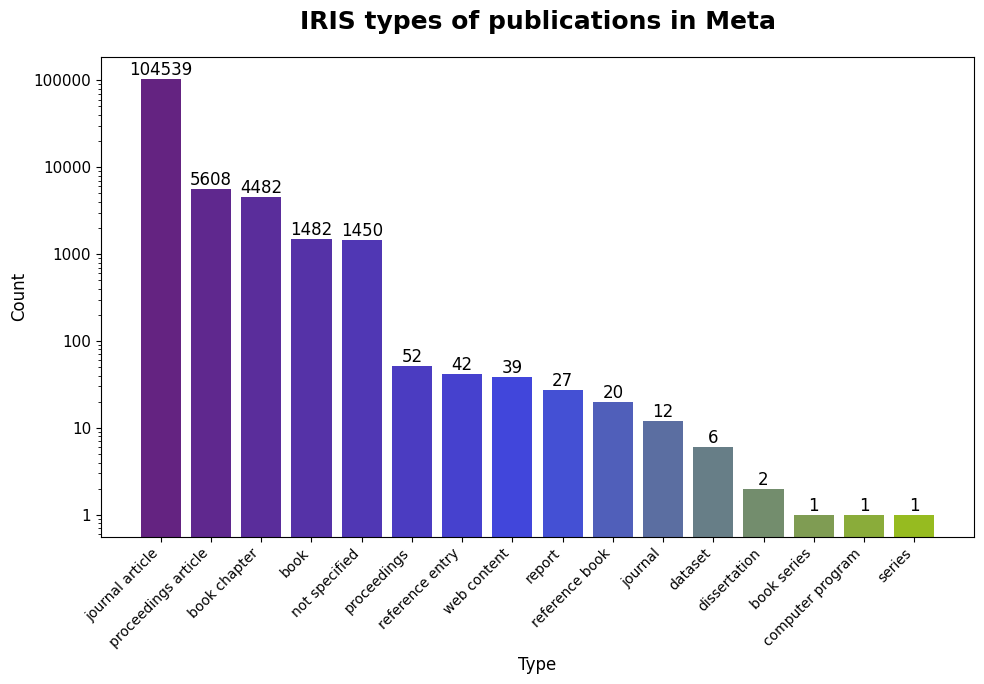

In [30]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

from answer_research_questions import answer_question_2

result_df = answer_question_2()

# Transform dataframe to dict
result = result_df.to_dict()

types = result['type']
counts = result['len']

types = ['not specified' if t == 'no type' else t for t in types]

color_start = '#642381'
color_middle = '#3E48E1'
color_end = '#96BB20'

cmap = LinearSegmentedColormap.from_list('custom_gradient', [color_start, color_middle, color_end])

# logaritmic scale
plt.figure(figsize=(10, 7))
bars = plt.bar(types, counts, color=cmap(np.linspace(0, 1, len(types))))

plt.yscale('log')
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 12  
plt.rcParams['axes.titlesize'] = 12  
plt.rcParams['axes.labelsize'] = 14  
plt.rcParams['legend.fontsize'] = 12  
plt.rcParams['xtick.labelsize'] = 10  
plt.rcParams['ytick.labelsize'] = 11 

def log_format(y, pos):
    return '{:.0f}'.format(y)

plt.gca().yaxis.set_major_formatter(FuncFormatter(log_format))

title_font_properties = {'weight': 'bold', 'size': 18}

plt.title('IRIS types of publications in Meta', fontdict=title_font_properties, pad=20)
plt.xlabel('Type')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')

# add values
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()

plt.savefig('img/Types_in_Meta.png', dpi=600)  

plt.show()


### RQ3 - RQ4 - Citations in IRIS

3. What is the amount of citations (according to OpenCitations Index) the IRIS publications included in OpenCitations Meta are involved in (as citing entity and as cited entity)?
4. How many of these citations come from and go to publications not included in IRIS, and how many of these citations involves publications in IRIS as both citing and cited entities?

In [ ]:
import matplotlib.pyplot as plt

from answer_research_questions import answer_question_3, answer_question_4, answer_question_5

# Data
total_3 = answer_question_3()
total_4 = answer_question_4()
total_5 = answer_question_5()

citations_total = total_3.item()
citations_non_iris_cited = total_4.select('cited').item()
citations_non_iris_citing = total_4.select('citing').item()
citations_iris_both = total_5.item()

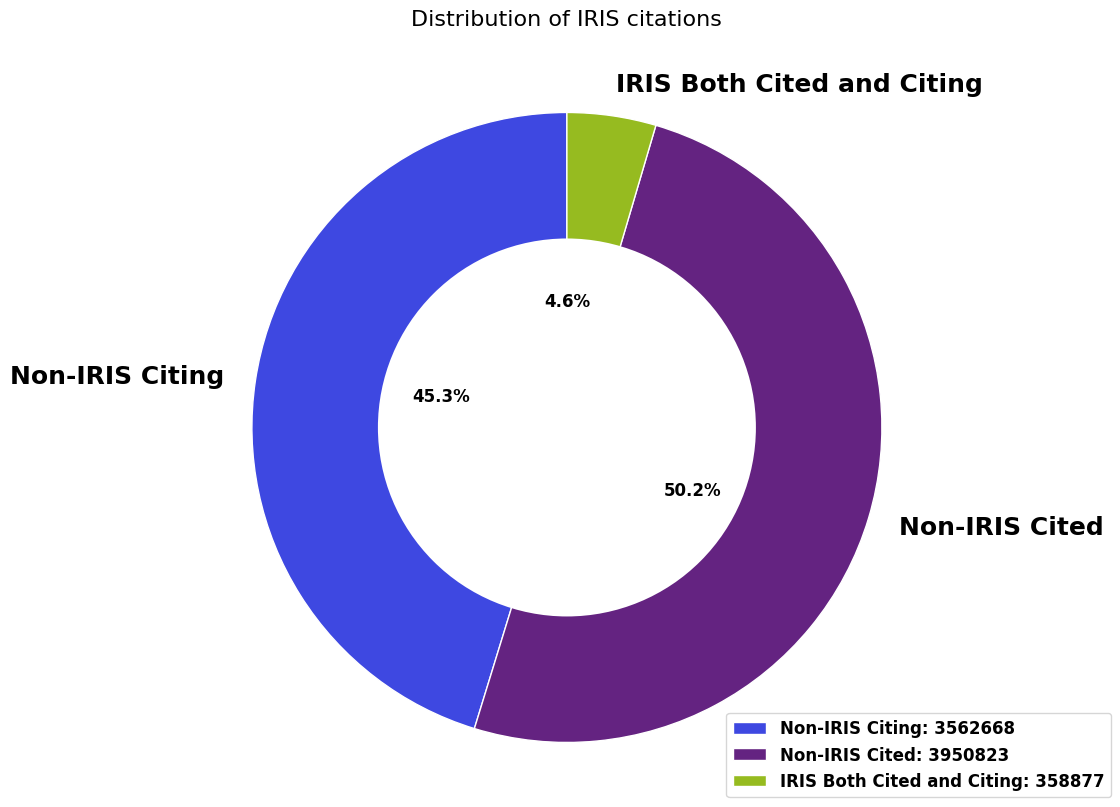

In [36]:
import matplotlib.pyplot as plt

from answer_research_questions import answer_question_3, answer_question_4, answer_question_5

citations_total = total_3.item()
citations_non_iris_cited = total_4.select('cited').item()
citations_non_iris_citing = total_4.select('citing').item()
citations_iris_both = total_5.item()

plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 12  
plt.rcParams['axes.titlesize'] = 18  
plt.rcParams['axes.labelsize'] = 14  
plt.rcParams['legend.fontsize'] = 12  
plt.rcParams['xtick.labelsize'] = 18  
plt.rcParams['ytick.labelsize'] = 18 

percentage_non_iris_citing = citations_non_iris_citing / citations_total * 100
percentage_non_iris_cited = citations_non_iris_cited / citations_total * 100
percentage_iris_both = citations_iris_both / citations_total * 100

sizes = [percentage_non_iris_citing, percentage_non_iris_cited, percentage_iris_both]
labels = ['Non-IRIS Citing', 'Non-IRIS Cited', 'IRIS Both Cited and Citing']
colors = ['#3E48E1', '#642381', '#96BB20'] 

fig, ax = plt.subplots(figsize=(13, 9))
wedges, texts, autotexts = ax.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    wedgeprops={'edgecolor': 'white'}
)

for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(12)  
    autotext.set_horizontalalignment('center') 
    if i == 0:
        autotext.set_position((-0.4, 0.1)) 
    elif i == 1:
        autotext.set_position((0.4, -0.2))  
    elif i == 2:
        autotext.set_position((0, 0.4)) 

center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

ax.axis('equal')

plt.title('Distribution of IRIS citations', fontsize=16, pad=40)

# Adding legend with actual values
actual_values_labels = [
    f'Non-IRIS Citing: {citations_non_iris_citing}',
    f'Non-IRIS Cited: {citations_non_iris_cited}',
    f'IRIS Both Cited and Citing: {citations_iris_both}'
]
ax.legend(wedges, actual_values_labels, loc='upper left', bbox_to_anchor=(0.65, 0.1))

plt.savefig('img/IRIS_citations.png', dpi=600)

plt.show()
